### Ejercicio 1

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
# Añadir el directorio de la otra carpeta al path
sys.path.append('C:/Users/Portables/Desktop/Materias/Circu/Circulacion-General-FCEN/modulo_oceano')

# Ahora puedes importar las funciones
from funciones.cargar_salida_QG import *

In [2]:
# Directorios de salida para cada modelo
base_dir = 'C:/Users/Portables/Desktop/Materias/Circu/Practica 1'

dir_salidas = {
    "S1": f"{base_dir}/out_tmp_S1/",
    "S2": f"{base_dir}/out_tmp_S2/",
    "M1": f"{base_dir}/out_tmp_M1/",
    "M2": f"{base_dir}/out_tmp_M2/"
}

# Dimensiones del modelo
Lx, Ly = 4000, 2000  # Dimensiones de la cuenca en km
nx, ny = 200, 100    # Puntos de grilla

In [3]:
import matplotlib.pyplot as plt

def analizar_spin_up(datos, titulo):
    # Datos[4] corresponde a QG_diag según la estructura de salida de la función cargar
    energias = datos[4][:, 3]  # Asumiendo que la energía cinética está en la cuarta columna
    plt.figure(figsize=(10, 6))
    plt.plot(energias, label='Energía Cinética')
    plt.title(titulo)
    plt.xlabel('Tiempo')
    plt.ylabel('Energía Cinética')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Establecer un criterio para determinar la estabilización
    umbral = 0.01  # 1% de cambio
    iteraciones_estables = 0
    for i in range(1, len(energias)):
        if abs((energias[i] - energias[i-1]) / energias[i-1]) < umbral:
            iteraciones_estables += 1
        else:
            iteraciones_estables = 0  # Reiniciar si el cambio es mayor que el umbral
        if iteraciones_estables >= 10:  # Número consecutivo de iteraciones estables
            print(f"El modelo {titulo} se estabilizó después de {i} iteraciones.")
            break


In [4]:
import matplotlib.pyplot as plt

def graficar_todas_energias(datos, titulos):
    plt.figure(figsize=(12, 8))
    for i, (data, title) in enumerate(zip(datos, titulos)):
        energias = data[4][:, 3]  # Asumimos que la columna 3 tiene la energía cinética
        plt.plot(energias, label=f'{title}')
    
    plt.title('Evolución de la Energía Cinética en los Modelos')
    plt.xlabel('Iteración')
    plt.ylabel('Energía Cinética')
    plt.legend()
    plt.grid(True)
    plt.show()

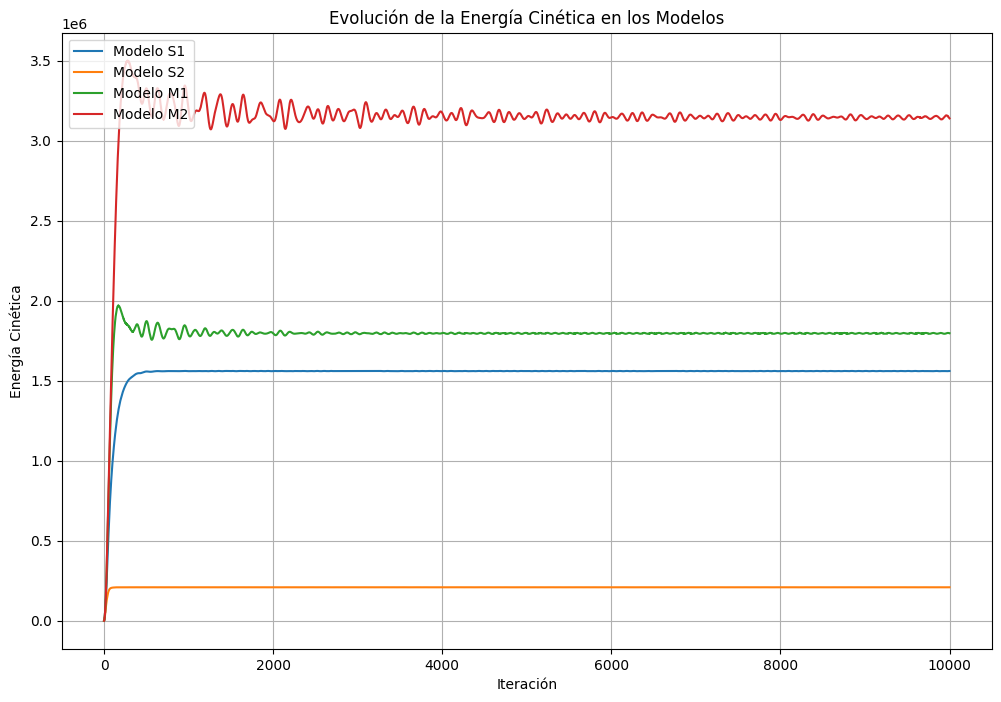

In [5]:
# Recopilar datos de cada modelo
datos_modelos = []
titulos = []

for nombre, dir_salida in dir_salidas.items():
    datos = cargar(dir_salida, Lx, Ly, nx, ny)
    datos_modelos.append(datos)
    titulos.append(f"Modelo {nombre}")

# Graficar la evolución de la energía cinética para todos los modelos
graficar_todas_energias(datos_modelos, titulos)

### Ejercicio 2

In [6]:
def calcular_transporte_meridional(psi, dx):
    """
    Calcula el transporte meridional a partir de la función corriente.
    psi: matriz de función corriente
    dx: distancia entre puntos en la dirección x, en metros
    """
    # Derivada zonal de la función corriente y conversión a Sverdrups (1 Sv = 1e6 m^3/s)
    My = -np.gradient(psi, axis=1) / dx * 1e-6
    return My

def calcular_transporte_meridional(psi, dx):
    """
    Calcula el transporte meridional a partir de la función corriente.
    psi: matriz de función corriente
    dx: distancia entre puntos en la dirección x, en metros
    """
    # Derivada zonal de la función corriente y conversión a Sverdrups (1 Sv = 1e6 m^3/s)
    My = -np.gradient(psi, axis=1) / dx * 1e-6
    return My

def plot_campos(X, Y, campo, titulo, xlabel, ylabel, cbar_label, ax=None, vmin=None, vmax=None, colormap='viridis', levels=100, show_points=False):
    """
    Función genérica para graficar campos 2D.
    Si se proporciona un objeto 'ax', se graficará en ese eje.
    De lo contrario, se crea una nueva figura.
    Si se proporcionan 'vmin' y 'vmax', se usarán para la escala de color.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    # Calcular los niveles de contorno
    level_values = np.linspace(vmin if vmin is not None else np.min(campo), 
                               vmax if vmax is not None else np.max(campo), levels)
    
    # Graficar con los límites de color especificados y niveles personalizados
    contourf = ax.contourf(X, Y, campo, levels=level_values, cmap=colormap)
    # Añadir líneas de contorno sobre el gráfico contourf
    ax.contour(X, Y, campo, levels=level_values, colors='k', linewidths=0.4)
    
    cbar = plt.colorbar(contourf, ax=ax)
    cbar.set_label(cbar_label)
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if show_points:
        # Crear una malla 2D para las coordenadas X e Y
        X_mesh, Y_mesh = np.meshgrid(X, Y)
        ax.scatter(X_mesh, Y_mesh, color='red', s=10)  # Puntos de control para verificar la alineación

    if ax is None:  # Solo mostrar si se crea una nueva figura
        plt.show()


### Adimensionalización

# Escalas típicas
tau = 0.25          # Tensión del viento [N/m^2]
L = 4000000         # Longitud de la cuenca [m]
D = 2500            # Profundidad [m]
beta = 2e-11        # Coeficiente de Coriolis [1/(s*m)]
rho = 1025          # Densidad [kg/m^3]

# Parámetros para la dimensionalización
U = (2*math.pi*tau)/(rho*D*beta*L)                              # Velocidad
Ro = (2*math.pi*tau)/(rho*D*(math.pow(beta,2)*(math.pow(L,3)))) # Número de Rossby


### Adimensionalización

# Escalas típicas
tau = 0.25          # Tensión del viento [N/m^2]
L = 4000000         # Longitud de la cuenca [m]
D = 2500            # Profundidad [m]
beta = 2e-11        # Coeficiente de Coriolis [1/(s*m)]
rho = 1025          # Densidad [kg/m^3]

# Parámetros para la dimensionalización
U = (2*math.pi*tau)/(rho*D*beta*L)                              # Velocidad
Ro = (2*math.pi*tau)/(rho*D*(math.pow(beta,2)*(math.pow(L,3)))) # Número de Rossby


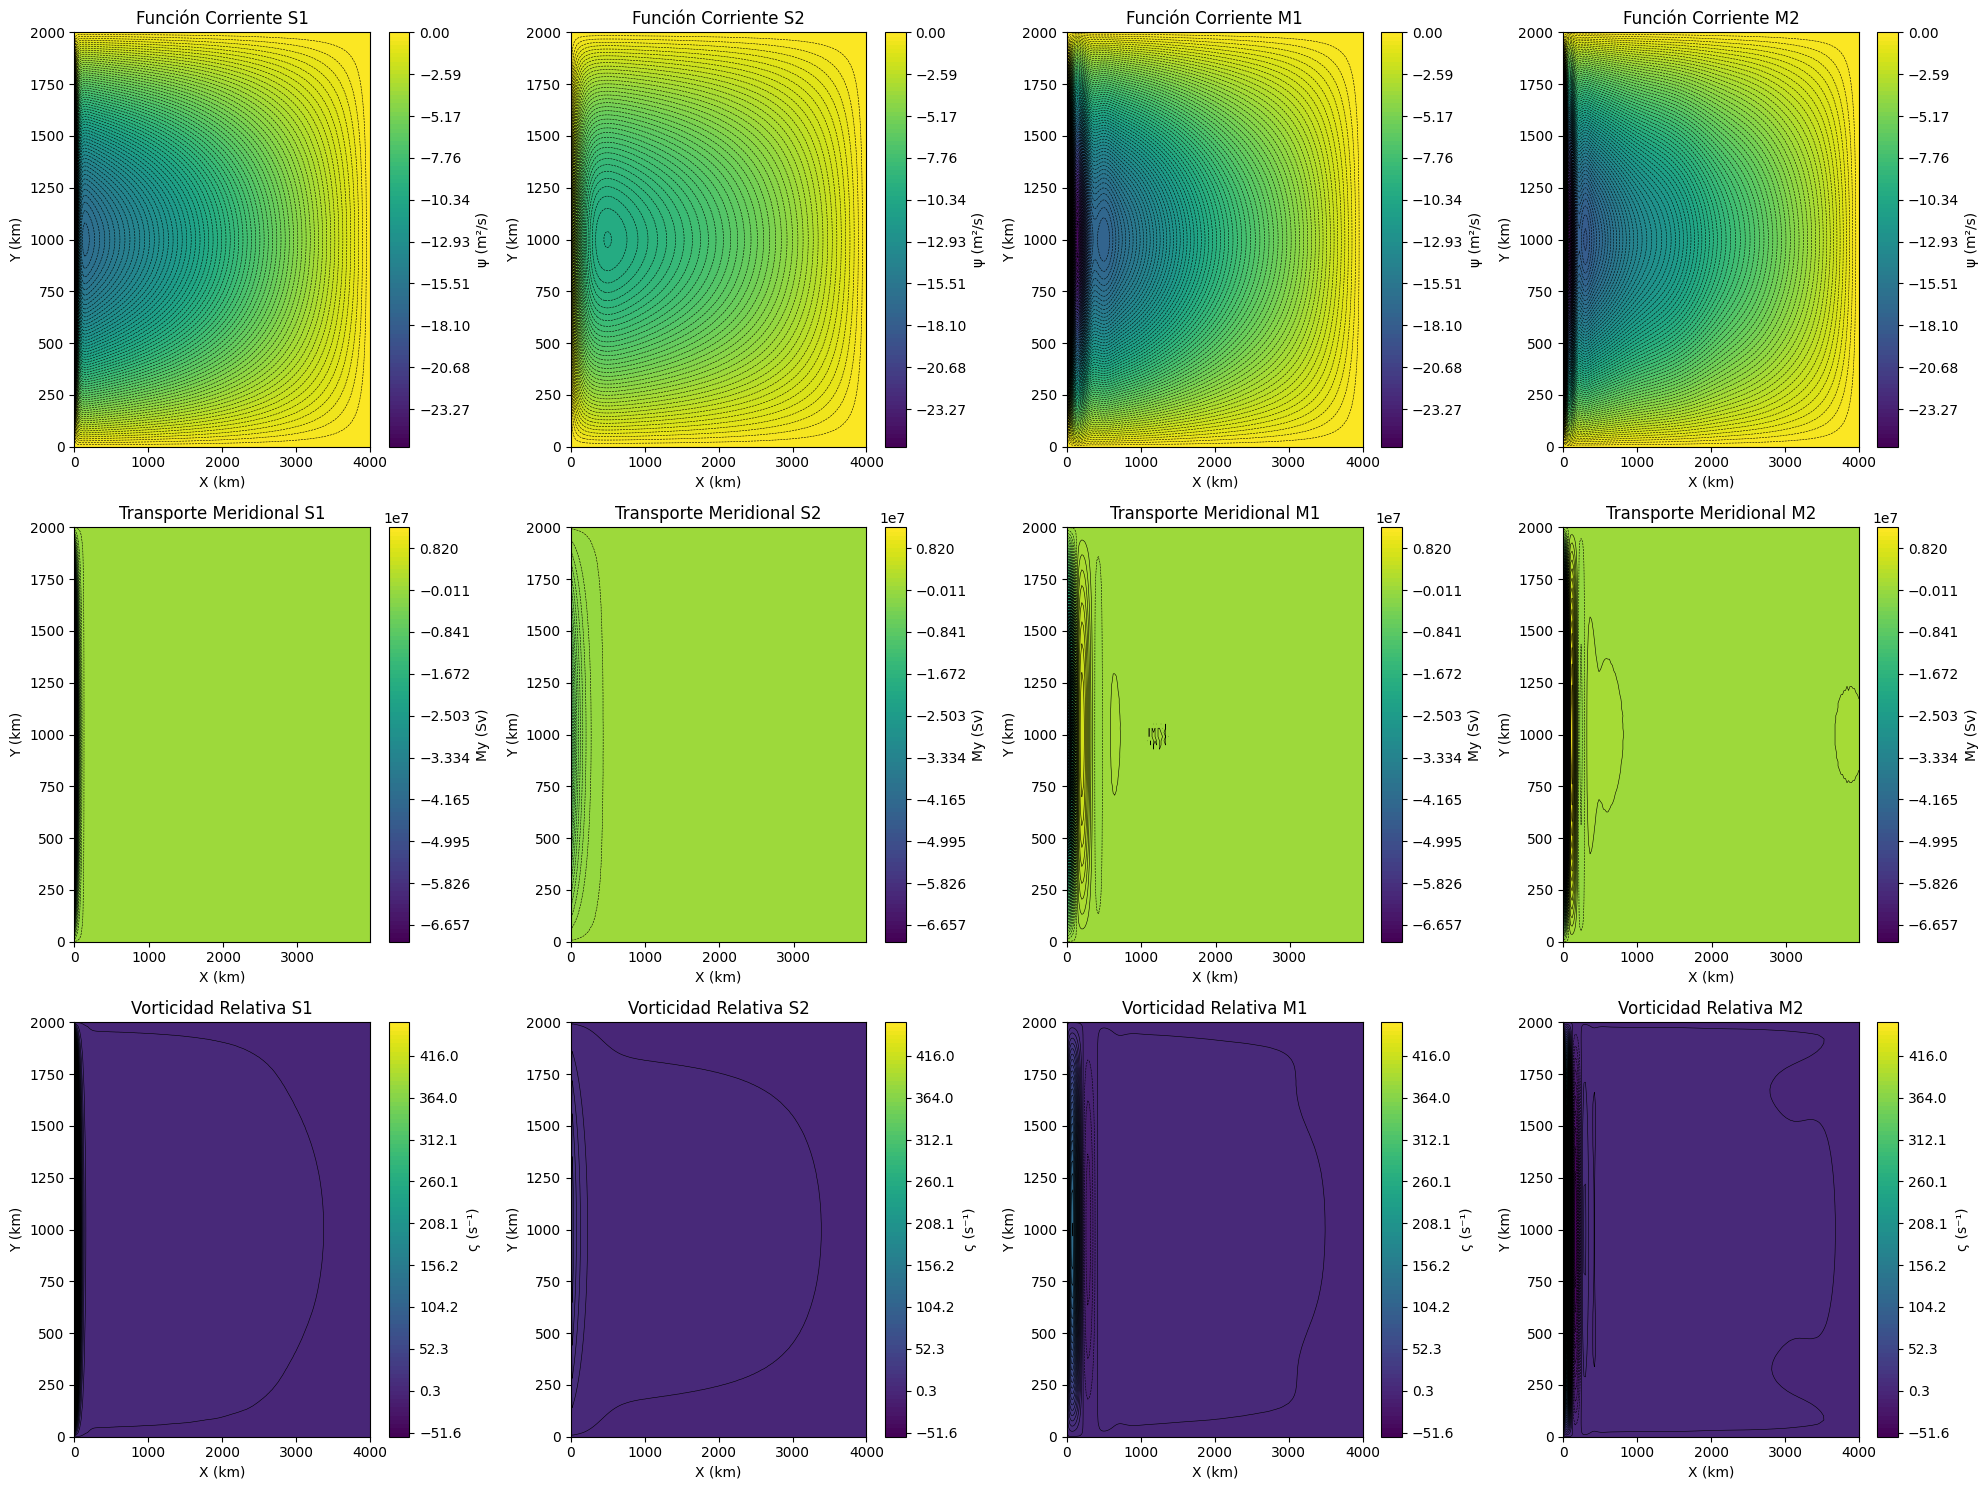

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 filas por 4 columnas

# Definir los límites de las escalas de color
psidim_min, psidim_max = float('inf'), float('-inf')
trans_mer_dim_min, trans_mer_dim_max = float('inf'), float('-inf')
vortdim_min, vortdim_max = float('inf'), float('-inf')

# Primera pasada para calcular los límites de color
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    
    # Adimensionalizar las variables
    psiadim = psiF / (U * L)
    vortadim = vortF / (U / L)

    # Dimensionalizar la función corriente y la vorticidad
    psidim = psiadim * U * L
    vortdim = vortadim * U / L

    # Calcular el transporte meridional adimensional y luego dimensionalizar
    trans_mer_adim = np.diff(psiadim, n=1, axis=1) * D
    trans_mer_dim = trans_mer_adim * U * D * L

    # Actualizar los límites de color para cada campo
    psidim_min, psidim_max = min(psidim_min, psidim.min()), max(psidim_max, psidim.max())
    trans_mer_dim_min, trans_mer_dim_max = min(trans_mer_dim_min, trans_mer_dim.min()), max(trans_mer_dim_max, trans_mer_dim.max())
    vortdim_min, vortdim_max = min(vortdim_min, vortdim.min()), max(vortdim_max, vortdim.max())

# Segunda pasada para graficar
idx = 0
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    X, Y = datos_modelo[6], datos_modelo[7]  # Coordenadas X y Y

    # Adimensionalizar las variables
    psiadim = psiF / (U * L)
    vortadim = vortF / (U / L)

    # Dimensionalizar la función corriente y la vorticidad
    psidim = psiadim * U * L
    vortdim = vortadim * U / L

    # Calcular el transporte meridional adimensional y luego dimensionalizar
    trans_mer_adim = np.diff(psiadim, n=1, axis=1) * D
    trans_mer_dim = trans_mer_adim * U * D * L

    # Graficar la función corriente
    ax = axs[0, idx]
    plot_campos(X, Y, psidim, f'Función Corriente {nombre}', 'X (km)', 'Y (km)', 'ψ (m²/s)', ax=ax, vmin=psidim_min, vmax=psidim_max)

    # Graficar el transporte meridional
    ax = axs[1, idx]
    plot_campos(X[:-1], Y, trans_mer_dim, f'Transporte Meridional {nombre}', 'X (km)', 'Y (km)', 'My (Sv)', ax=ax, vmin=trans_mer_dim_min, vmax=trans_mer_dim_max)

    # Graficar la vorticidad relativa
    ax = axs[2, idx]
    plot_campos(X, Y, vortdim, f'Vorticidad Relativa {nombre}', 'X (km)', 'Y (km)', 'ς (s⁻¹)', ax=ax, vmin=vortdim_min, vmax=vortdim_max)

    idx += 1

# Ajustar los espacios entre los subplots
plt.tight_layout()
plt.show()

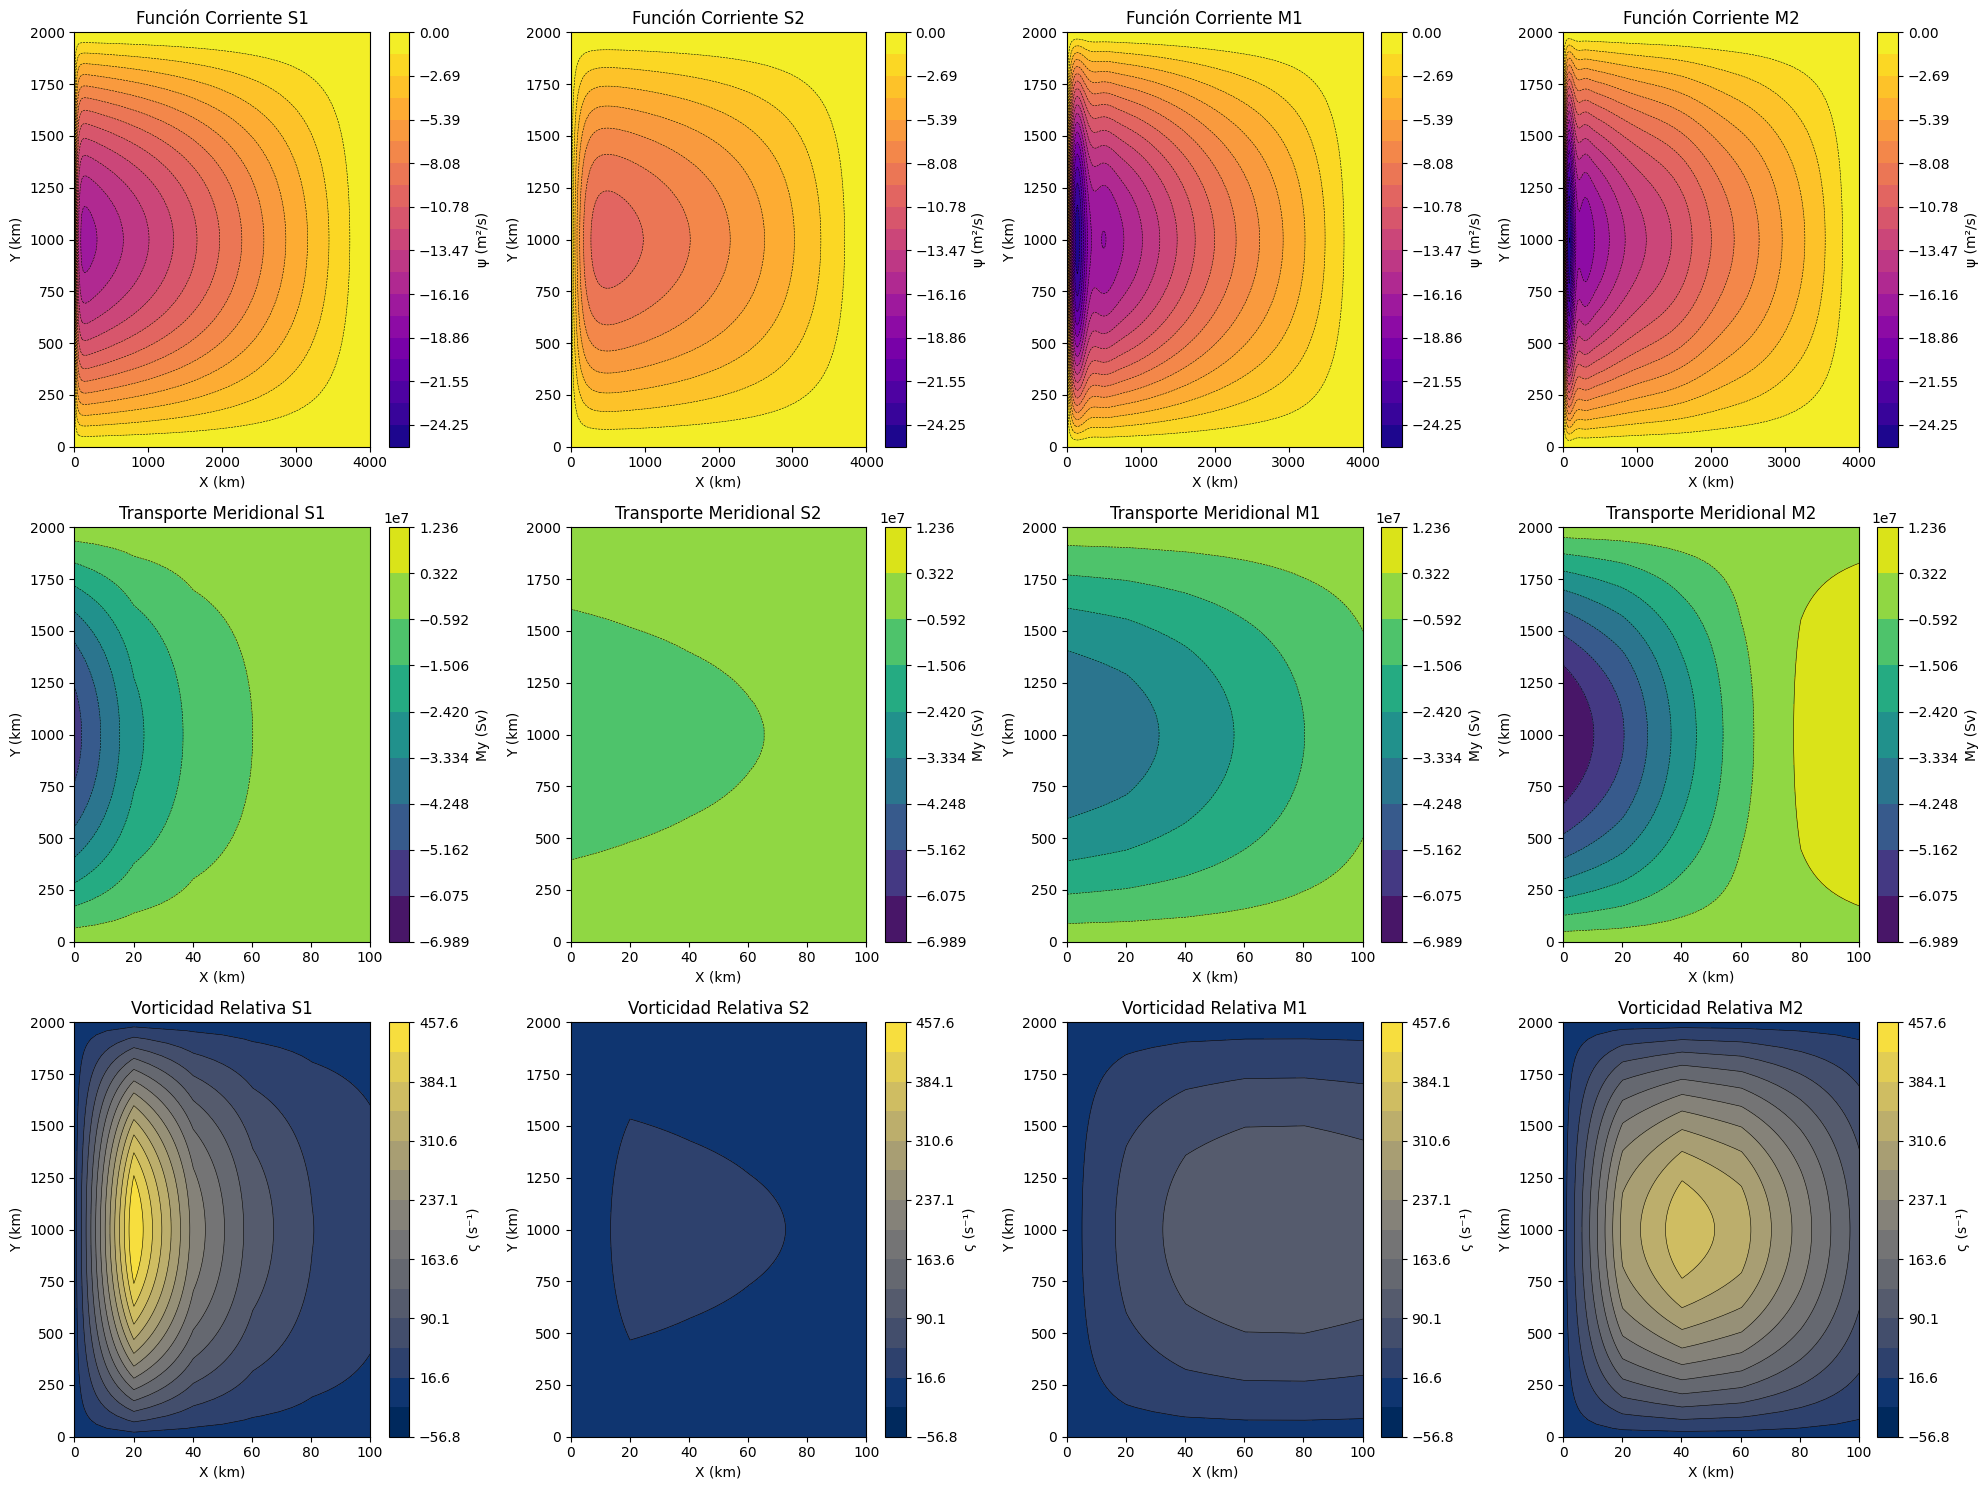

In [8]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 filas por 4 columnas

# Definir los límites de las escalas de color
psidim_min, psidim_max = float('inf'), float('-inf')
trans_mer_dim_min, trans_mer_dim_max = float('inf'), float('-inf')
vortdim_min, vortdim_max = float('inf'), float('-inf')

# Primera pasada para calcular los límites de color
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    
    # Adimensionalizar las variables
    psiadim = psiF / (U * L)
    vortadim = vortF / (U / L)

    # Dimensionalizar la función corriente y la vorticidad
    psidim = psiadim * U * L
    vortdim = vortadim * U / L

    # Calcular el transporte meridional adimensional y luego dimensionalizar
    trans_mer_adim = np.diff(psiadim, n=1, axis=1) * D
    trans_mer_dim = trans_mer_adim * U * D * L

    # Actualizar los límites de color para cada campo
    psidim_min, psidim_max = min(psidim_min, psidim.min()), max(psidim_max, psidim.max())
    trans_mer_dim_min, trans_mer_dim_max = min(trans_mer_dim_min, trans_mer_dim.min()), max(trans_mer_dim_max, trans_mer_dim.max())
    vortdim_min, vortdim_max = min(vortdim_min, vortdim.min()), max(vortdim_max, vortdim.max())

# Segunda pasada para graficar
idx = 0
x_lim_zoom = 100  # Limite especial para el eje X en los primeros 100 km
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    X, Y = datos_modelo[6], datos_modelo[7]  # Coordenadas X y Y

    # Adimensionalizar las variables
    psiadim = psiF / (U * L)
    vortadim = vortF / (U / L)

    # Dimensionalizar la función corriente y la vorticidad
    psidim = psiadim * U * L
    vortdim = vortadim * U / L

    # Calcular el transporte meridional adimensional y luego dimensionalizar
    trans_mer_adim = np.diff(psiadim, n=1, axis=1) * D
    trans_mer_dim = trans_mer_adim * U * D * L

    # Graficar la función corriente (sin límite en X) con puntos de control
    ax = axs[0, idx]
    plot_campos(X, Y, psidim, f'Función Corriente {nombre}', 'X (km)', 'Y (km)', 'ψ (m²/s)', ax=ax, vmin=psidim_min, vmax=psidim_max, colormap='plasma', levels=20)

    # Graficar el transporte meridional (con límite en X) con puntos de control
    ax = axs[1, idx]
    plot_campos(X[:-1], Y, trans_mer_dim, f'Transporte Meridional {nombre}', 'X (km)', 'Y (km)', 'My (Sv)', ax=ax, vmin=trans_mer_dim_min, vmax=trans_mer_dim_max, colormap='viridis', levels=10)
    ax.set_xlim([0, x_lim_zoom])  # Aplicar el límite en X

    # Graficar la vorticidad relativa (con límite en X) con puntos de control
    ax = axs[2, idx]
    plot_campos(X, Y, vortdim, f'Vorticidad Relativa {nombre}', 'X (km)', 'Y (km)', 'ς (s⁻¹)', ax=ax, vmin=vortdim_min, vmax=vortdim_max, colormap='cividis', levels=15)
    ax.set_xlim([0, x_lim_zoom])  # Aplicar el límite en X

    idx += 1

# Ajustar los espacios entre los subplots
plt.tight_layout()
plt.show()

In [9]:
print(f"Shape of X: {X.shape}, Shape of Y: {Y.shape}, Shape of campo: {campo.shape}")


NameError: name 'campo' is not defined